### Parte 1: Programando uma Rede Neural para Visão Computacional

Neste exemplo, iniciaremos o estudo do uso de Redes Neurais em Visão Computacional.

Nossas entradas serão imagens e a saída da rede será a probabilidade de que a imagem pertence a uma das determinadas classes conhecidas.

No caso em questão utilizaremos a base de dados [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist), que contém 70.000 imagens de peças de roupas entre 10 classes diferentes mostradas na tabela abaixo:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

As imagens estão no formato de 28x28 pixels e estão em escala de cinza (*gray scale*), ou seja, o valor de cada pixel da imagem é um número inteiro de 0 a 255.

Um exemplo de algumas das imagens do dataset pode ser vista abaixo, onde cada classe ocupa 3 linhas:

<img src="https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png"></img>



In [1]:
# Bibliotecas utilizadas no exemplo
import tensorflow as tf
import numpy as np
# A matplotlib é uma biblioteca muito utilizada para plotar imagens de modo simples
import matplotlib.pyplot as plt

A Fashion MNIST pode ser obtida por uma chamada de uma API própria do tensorflow, facilitando o trabalho.

Diferente do que tivemos anteriormente, onde todos nossos dados era utilizados para treinamento, quando lidamos com problemas mais complexos é comum ter nossos dados divididos entre conjunto para treinamento e conjunto para teste.

A Fashion MNIST já é separada previamente, com 60.000 imagens sendo utilizadas para treinamento e as 10.000 restantes utilizadas para teste.

Assim, na chamada da API, receberemos os dados separados conforme o código demonstra.

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Dando uma olhada nos dados recebidos, podemos observar que os labels são números, e não textos como "shirt", "shoe".

Em parte, essa escolha é feita pela maior facilidade dos computadores de lidar com números que com texto.

Além disso, ajuda a reduzir o problema do *bias* (em português, viés). Mais sobre bias e outros paradigmas pode ser lido neste [artigo da Google AI](https://ai.google/responsibility/responsible-ai-practices/).

Shape de train_images = (60000, 28, 28)
Shape de train_labels = (60000,)

Shape de test_images = (10000, 28, 28)
Shape de test_labels = (10000,)

Label da imagem representada = 5
Imagem representada: 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  32  60   0   0   0   0   0   0   0   0   0   

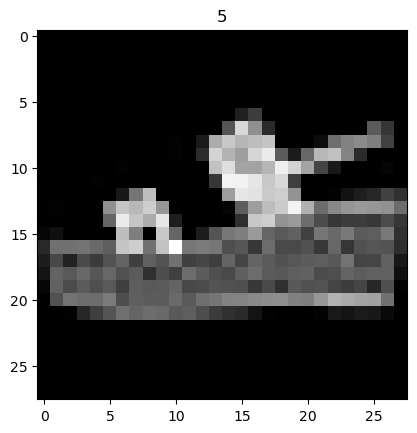

In [3]:
print(f"Shape de train_images = {train_images.shape}")
print(f"Shape de train_labels = {train_labels.shape}\n")

print(f"Shape de test_images = {test_images.shape}")
print(f"Shape de test_labels = {test_labels.shape}\n")

imagem_exemplo = 12
print(f"Label da imagem representada = {train_labels[imagem_exemplo]}")
# Seta o número de caracteres por linha na impressão
np.set_printoptions(linewidth=320)
print(f"Imagem representada: \n\n{train_images[imagem_exemplo]}")

plt.title(f"{train_labels[imagem_exemplo]}") # Título do gráfico (utilizado o label da imagem)
plt.imshow(train_images[imagem_exemplo], cmap='gray', vmin=0, vmax=255) # Plotando a imagem em grayscale (valores entre 0 e 255)
plt.show() # Função para plotar a figura criada

#### Extra:

Um plot um pouco mais detalhado de imagens exemplo:

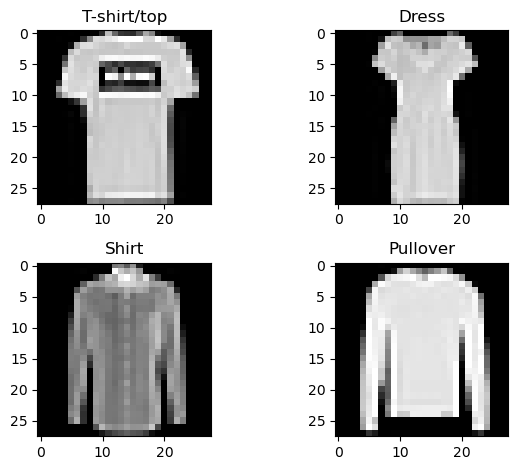

In [4]:
# classes é uma estrutura do tipo dicionário, com ela vamos relacionar cada label
# numérico à descrição da classe das imagens
classes = { 0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal",
           6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot" }

# Imagens do dataset escolhidas (para train < 60000 e para test < 10000)
imgs_exemplo = np.array([[1, 20], [3000, 15000]])

# Criando uma matriz de plots 2x2
fig, axs = plt.subplots(2, 2)
# Auxiliares para plotar:
x=0
y=0

# Para cada par x,y vai plotar a imagem equivalente
axs[x, y].imshow(train_images[imgs_exemplo[x,y]], cmap='gray', vmin=0, vmax=255)  # 0,0 (esq sup)
axs[x, y].set_title(classes[train_labels[imgs_exemplo[x,y]]])
x+=1
axs[x, y].imshow(train_images[imgs_exemplo[x,y]], cmap='gray', vmin=0, vmax=255)  # 1,0 (esq inf)
axs[x, y].set_title(classes[train_labels[imgs_exemplo[x,y]]])
y+=1
axs[x, y].imshow(train_images[imgs_exemplo[x,y]], cmap='gray', vmin=0, vmax=255)  # 1,1 (dir inf)
axs[x, y].set_title(classes[train_labels[imgs_exemplo[x,y]]])
x-=1
axs[x, y].imshow(train_images[imgs_exemplo[x,y]], cmap='gray', vmin=0, vmax=255)  # 0,1 (dir sup)
axs[x, y].set_title(classes[train_labels[imgs_exemplo[x,y]]])
fig.tight_layout()

#### Normalização dos dados

Como dito anteriormente, as imagens apresentam valores de pixels entre 0 e 255, mas as Redes Neurais geralmente lidam melhor com dados normalizados.

Assim, antes de treinar a rede, vamos alterar nossos dados para que os valores de pixels variem entre 0 e 1. Em python esta operação é bem simples:

In [5]:
# Normalizando os valores dos pixels das imagens de treino e teste:
train_images = train_images / 255.0
test_images = test_images / 255.0

#### Criando a Rede Neural


Diferentemente do exemplo anterior, agora temos 3 camadas na Rede, ao invés de apenas 1.

O mais importante de frisar são a primeira e a última camadas.

- A última camada tem 10 neurônios, devido a termos 10 classes em nosso dataset. Esses valores devem ser sempre iguais (em problemas de classificação), número de neurônios de saída igual ao número de classes do modelo.
- Como nossas imagens tem uma resolução 28x28 pixels, nosso `Input()` recebe um `shape=(28,28)`. A primeira camada, `Flatten()` transforma a matriz 28x28, que representa a imagem, em um vetor linear simples.

A camada do meio, geralmente chamada de camado oculta (*hidden layer*) é onde as coisas interessantes geralmente acontecem. É possível imaginá-la como uma equação que mapeia os 784 pixels que representam uma imagem no label de 0 a 9, no exemplo da figura abaixo, são os 784 pixels da bota, através dos quais a equação obtém o número 9, equivalente a sua classe.

A rede tem o trabalho de descobrir os valores de $w_0, w_1, w_2, ..., w_n$ que mapeiam y para 9, quando a imagem é de uma bota.

Mais detalhes sobre a matemática por trás das *hidden layers* podem ser obtidos no vídeo [Neural Network Overview (C1W3L01) - DeepLearningAI](https://www.youtube.com/watch?v=fXOsFF95ifk).

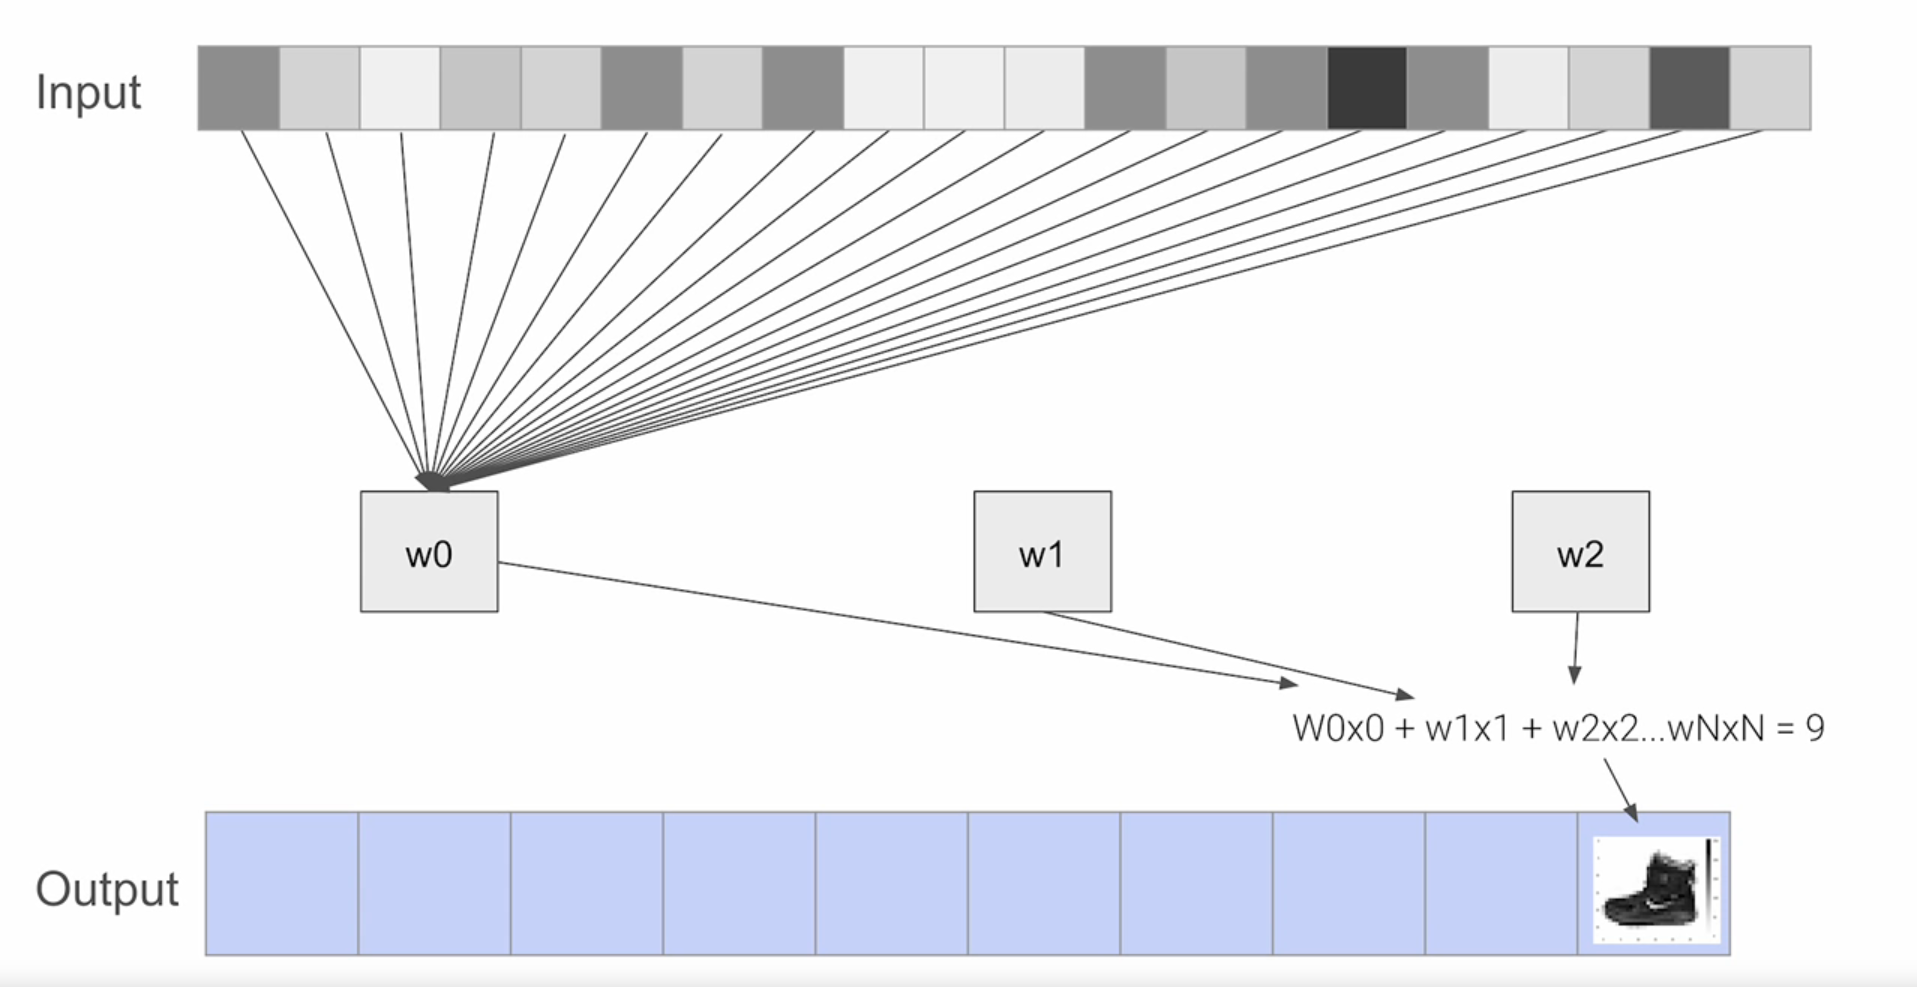

In [6]:
# Contruindo o modelo de classificação
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

Apenas para revisar:

`Sequential`: Define uma sequência de camadas para a Rede Neural.

`Flatten`: Transforma nossa entrada (uma matriz de 28x28), em um vetor unidimensional.

`Dense`: Adiciona as camadas de neurônios. Cada camada de neurônios precisa de uma **função de ativação** para guiá-la no que fazer com os dados. Exitem muitas opções de funções de ativação, mas as que usamos no exemplo são:

- `ReLU`, em resumo significa:

```
    if x < 0:
      return x
    else:
      return 0
```

Ou seja, a `ReLU` só passa valores maiores que 0 para a próxima camada da rede.

- `Softmax`: pega uma lista de valores e os transforma de modo que a soma de todos os elementos seja 1. Quando aplicada às saídas do modelo, pode-se pensar nos valores transformados como a probabilidade de que a entrada pertence aquela classe.

  Por exemplo, no nosso modelo de classificação que tem 10 unidades na camada densa de saída, ter o maior valor de saída no `índice = 4` significa que para o modelo, a entrada dada tem a maior chance de ser da classe *coat*. Se o maior valor for no índice = 5, então para o modelo, a entrada é da classe *sandal*, e assim por diante.
  
  Um pequeno exemplo do funcionamento da softmax é demonstrado abaixo, caso ainda não tenha ficado claro:

##### Exemplo aplicação da Softmax

In [7]:
# Declarando uma amostra de entradas e as convertendo para tensores:
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f"Input para função de softmax: {inputs.numpy()}")

# Passando os valores de entrada para a função de ativação softmax:
outputs = tf.keras.activations.softmax(inputs)
print(f"Output da função de softmax: {outputs.numpy()}")

# Pegando a soma dos valores depois da softmax:
sum_out = tf.reduce_sum(outputs)
print(f"Soma dos valores de saída: {sum_out}")

# Pegando o índice do maior valor:
prediction = np.argmax(outputs)
print(f"Classe com a maior probabilidade: {prediction}")

Input para função de softmax: [[1. 3. 4. 2.]]
Output da função de softmax: [[0.0320586  0.23688282 0.64391426 0.08714432]]
Soma dos valores de saída: 1.0
Classe com a maior probabilidade: 2


#### Voltando a Rede Neural

Assim como no exemplo anterior, vamos compilar nosso modelo criado, definindo o otimizador e a função de perda.

Relembrando: a **função de perda** calcula o quão distante o modelo esteve do label real da entrada e de acordo com essa resposta, o otimizador define o próximo "chute" do modelo.

In [8]:
# Compilando o modelo com o otimizador e função de perda
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

Vamos treinar apenas por `5 epochs`, para não perder muito tempo.

Com esse breve treinamento, já obtemos uma perda de apenas cerca de `0.299`, o que não é suficiente, mas é bom o bastante para apenas `5 epochs`.

In [9]:
# E treinando o modelo criado
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 1ms/step - loss: 0.4983 - accuracy: 0.8260
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3759 - accuracy: 0.8654
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3378 - accuracy: 0.8775
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3134 - accuracy: 0.8845
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2969 - accuracy: 0.8908


A medida que realmente importa da performance do modelo, está no tentativa de predição com os dados de teste.

A perfomance esperada deve ser algo pior que o obtido no treinamento, mas uma performance muito pior já pode ser considerada um problema.

In [10]:
# Avaliação do modelo com os dados de teste (não vistos previamente pela rede)
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 850us/step - loss: 0.3396 - accuracy: 0.8762


[0.3396094739437103, 0.8762000203132629]

É possível ajustar algumas configurações para tentar obter um modelo melhor, por exemplo: o número de camadas/neurônios nas camadas e o número de épocas.

---
### Exercícios Laboratório 1:

#### Exercício 1:

O código abaixo obtém a classificação para cada uma das imagens de teste de acordo com o modelo criado anteriormente, e imprime os valores para a primeira entrada (primeira imagem).

A saída do código é uma lista de números. Por que uma lista e o que esses números poderiam representar?

OBS.: é preciso rodar o treinamento do modelo que fizemos acima, no exemplo, para funcionar.

In [11]:
classifications = model.predict(test_images)

print(classifications[0])

313/313 [==============================] - 0s 732us/step
[3.3831207e-06 7.5938516e-08 9.4158843e-08 3.9876742e-08 9.1470305e-08 1.2378199e-03 1.6470144e-06 1.9773193e-02 1.0147373e-05 9.7897357e-01]


**Dica**: Tente rodar `print(test_labels[0])`, e o resultado será `9`. Isso ajuda a entender por que a lista é tem essa configuração?

In [12]:
print(test_labels[0])

9


E1Q1: O que esta lista representa?
1. São 10 valores aleatórios sem significado
2. São as 10 primeiras classificações que o modelo fez
3. É a probabilidade que este item tem de ser de cada uma das 10 classes

A saída do modelo é uma lista de 10 números, onde cada um desses números é a probabilidade de que o valor de entrada pertença a classe equivalente ao índice da lista. Ou seja, o primeiro valor da lista é a probabilidade de que a imagem pertença a classe '0' (T-shirt/top), o próximo é '1' (Trouser), etc. Note que essas probabilidades são todas baixíssimas.

Para o índice 9 (Ankle boot), a probabilidade foi próxima a 90%, ou seja, a Rede está indicando que a imagem é muito provavelmente da classe 'ankle boot'.

Uma boa maneira de filtrar a saída da rede é com o seguinte código:

In [13]:
# Abaixo deve imprimir algo muito próximo a '1'
print(f"Soma dos valores em classifications[0]: {np.sum(classifications[0])}")
# Abaixo deve imprimir a classe numérica encontrada pela rede para a 1a imagem
print(f"Maior valor em classifications[0]: {np.argmax(classifications[0])}")

Soma dos valores em classifications[0]: 1.0
Maior valor em classifications[0]: 9


#### Exercício 2:

Vamos observar as camadas do nosso modelo. Faça experimentos com diferentes valors para a camada com 512 neurônios. Qual a diferença nos resultados em termos de *loss*, tempo de treinamento, etc? Por que há essa mudança nos resultados?

In [23]:
# Lendo os dados da Fashion MNIST
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalizando os valores dos dados de entrada (0 à 255 -> 0 à 1)
training_images = training_images / 255.0
test_images = test_images / 255.0

# Criando o modelo
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu), # Tente mudar o número de neurônios dessa camada
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compilando o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Treinando:\n")
model.fit(training_images, training_labels, epochs=5)

print("\nAvaliação nos dados de teste:\n")
model.evaluate(test_images, test_labels)

print("\nPredições dos dados de teste:\n")
predictions = model.predict(test_images)

print(f"\nClasse real da primeira imagem de teste: {test_labels[0]}\nProbabilidade de cada classe:\n{predictions[0]}")

Treinando:

Epoch 1/5
1875/1875 [==============================] - 21s 10ms/step - loss: 0.4713 - accuracy: 0.8309
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3569 - accuracy: 0.8701
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3184 - accuracy: 0.8828
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2971 - accuracy: 0.8893
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2786 - accuracy: 0.8951

Avaliação nos dados de teste:

313/313 [==============================] - 1s 2ms/step - loss: 0.3330 - accuracy: 0.8824

Predições dos dados de teste:

313/313 [==============================] - 1s 2ms/step

Classe real da primeira imagem de teste: 9
Probabilidade de cada classe:
[1.2441993e-07 3.5615608e-10 6.6002021e-10 4.7070203e-10 5.8119737e-10 2.0999826e-02 9.2036245e-09 1.5413373e-02 1.7649552e-09 9.6358669e-01]


E2Q1: Mude para 1024 neurônios na camada. Qual o impacto? (**O ideal é rodar cada tentativa pelo menos 3 ou 5 vezes e fazer uma média**)

1. O treinamento leva mais tempo, mas tem maior acurácia
2. O treinamento leva mais tempo, mas não há impacto na acurácia
3. O treinamento leva o mesmo tempo, mas tem maior acurácia

A resposta correta é (1), mas também pode ocorrer (2), já que estamos treinando por pouquíssimas épocas.

Em geral, adicionar mais neurônios faz com que a rede tenha de fazer mais cálculos, tornando o processo mais lento, mas pode resultar num bom impacto: aumentar a acurácia.

Essa relação "mais neurônios, mais acurácia" nem sempre é certeira, e é necessário um cuidado para não tornar uma Rede Neural desnecessariamente complexa para um problema não tão complexo quanto.

#### 512 neurônios: 
| Tentativa | Tempo para treinar | Perda treino | Acurácia treino | Perda teste | Acurácia teste |
| --- | --- | --- | --- | --- | --- |
| 1 | 47s | 0.2801 | 0.8951 | 0.3374 | 0.8789 |
| 2 | 43s | 0.2806 | 0.8970 | 0.3446 | 0.8761 |
| 3 | 45s | 0.2802 | 0.8976 | 0.3338 | 0.8811 |
| 4 | 44s | 0.2793 | 0.8964 | 0.3323 | 0.8789 |
| 5 | 43s | 0.2823 | 0.8941 | 0.3464 | 0.8745 |
| Média | 44.4s | 0.2805 | 0.8960 | 0.3389 | 0.8779 |

#### 1024 neurônios: 
| Tentativa | Tempo para treinar | Perda treino | Acurácia treino | Perda teste | Acurácia teste |
| --- | --- | --- | --- | --- | --- |
| 1 | 91s | 0.2809 | 0.8948 | 0.3265 | 0.8830 |
| 2 | 94s | 0.2785 | 0.8964 | 0.3464 | 0.8770 |
| 3 | 94s | 0.2778 | 0.8961 | 0.3467 | 0.8774 |
| 4 | 93s | 0.2781 | 0.8964 | 0.3382 | 0.8761 |
| 5 | 93s | 0.2786 | 0.8951 | 0.3330 | 0.8824 |
| Média | 93s | 0.2787 | 0.8957 | 0.3381 | 0.8791 |

#### Diferença 512 x 1024

Treinando 5 vezes por 5 épocas para 512 neurônios e 1024 neurônios, vemos que a perda média diminuiu para 1024 neurônios, mas a acurácia média de treino piorou, então não é uma melhora significativa.

| | 512 neurônios | 1024 neurônios | Diferença |
|---| --- | --- | --- |
| Tempo para treino | 44s | 93s | +111% |
| Perda treino | 0.2805 | 0.2787 | -0.64% |
| Acurácia treino | 0.8960 | 0.8957 | -0.03% |
| Perda teste | 0.3389 | 0.3381 | -0.23% |
| Acurácia teste | 0.8779 |  0.8791 | +0.13% |

#### Exercício 3:

E3Q1: O que aconteceria ao remover a camada `Flatten()`? E porque isto acontece?

Ao remover a camada `Flatten()`, teremos um erro no formato dos dados.

Pode parecer vago, mas reenforça a necessidade de a primeira camada da Rede ter o mesmo formado dos nossos dados. No caso, temos imagens de 28x28 pixels, e 28 camadas de 28 neurônios seria inviável, então usamos o `Flatten` para que nossos 28x28 pixels sejam entendidos como 784x1.

##### Teste abaixo:

In [ ]:
# Lendo os dados da Fashion MNIST
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalizando os valores dos dados de entrada (0 à 255 -> 0 à 1)
training_images = training_images / 255.0
test_images = test_images / 255.0

# Criando o modelo
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    # tf.keras.layers.Flatten(), # Teste comentar essa linha
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compilando o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Treinando:\n")
model.fit(training_images, training_labels, epochs=5)

print("\nAvaliação nos dados de teste:\n")
model.evaluate(test_images, test_labels)

print("\nPredições dos dados de teste:\n")
predictions = model.predict(test_images)

print(f"\nClasse real da primeira imagem de teste: {test_labels[0]}\nProbabilidade de cada classe:\n{predictions[0]}")

#### Exercício 4:

E4Q1: Considere a camada final (camada de saída).
- Por que há 10 neurônios nela?
- O que aconteceria se o valor fosse diferente de 10? Por exemplo, tente abaixo uma rede com 5 neurônios na saída.

Se fosse diferente de 10, teriamos um erro assim que chegassemos a um valor inesperado. É necessário que a última camada da rede acompanhe o número de classes para as quais estamos realizando a classificação. 

No nosso caso, estamos classificando para os dígitos 0 à 9, ou seja, 10 classes, então precisamos de 10 neurônios na última camada da rede.

##### Teste abaixo:

In [ ]:
# Lendo os dados da Fashion MNIST
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalizando os valores dos dados de entrada (0 à 255 -> 0 à 1)
training_images = training_images / 255.0
test_images = test_images / 255.0

# Criando o modelo
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(5, activation=tf.nn.softmax) # Tente mudar o número de neurônios dessa camada
])

# Compilando o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Treinando:\n")
model.fit(training_images, training_labels, epochs=5)

print("\nAvaliação nos dados de teste:\n")
model.evaluate(test_images, test_labels)

print("\nPredições dos dados de teste:\n")
predictions = model.predict(test_images)

print(f"\nClasse real da primeira imagem de teste: {test_labels[0]}\nProbabilidade de cada classe:\n{predictions[0]}")

#### Exercício 5:

Considere os efeitos de camadas adicionais na Rede Neural. O que acontece se adicionarmos uma camada entre a de 512 neurônios e a camada final de 10?

**OBS.: O ideal é rodar cada tentativa pelo menos 3 ou 5 vezes e fazer uma média para obter uma comparação coerente.**

A realidade é que o efeito não é significativo, porque nossos dados são relativamente simples.

Para dados mais complexos (como imagens coloridas), geralmente precisamos de mais camadas.

##### Teste abaixo:

In [ ]:
# Lendo os dados da Fashion MNIST
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalizando os valores dos dados de entrada (0 à 255 -> 0 à 1)
training_images = training_images / 255.0
test_images = test_images / 255.0

# Criando o modelo
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    # tf.keras.layers.Dense(32, activation=tf.nn.relu), # Teste adicionar uma nova camada aqui
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compilando o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Treinando:\n")
model.fit(training_images, training_labels, epochs=5)

print("\nAvaliação nos dados de teste:\n")
model.evaluate(test_images, test_labels)

print("\nPredições dos dados de teste:\n")
predictions = model.predict(test_images)

print(f"\nClasse real da primeira imagem de teste: {test_labels[0]}\nProbabilidade de cada classe:\n{predictions[0]}")

#### Exercício 6:

Considere o impacto de treinar por mais ou menos épocas. Qual seria o efeito?

- Tente 15 épocas: o modelo provavelmente apresentara uma perda muito melhor que ao treinar por 5 épocas.
- Tente 30 épocas: a partir de certo ponto a diminuição no valor da perda será cada vez menor, e às vezes poderá até sofrer pequenos aumentos. Também existe a possibilidade de que para o conjunto de teste não seja apresentada melhora, ou pode até piorar em relação às 15 épocas.

Essa piora para o conjunto de teste pode ser um efeito do 'overfitting', ao qual devemos nos atentar ao treinar uma Rede Neural. Em resumo, treinar muito sobre o conjunto de treino pode "viciar" o modelo nos dados aos quais foi exposto até então, não conseguindo generalizar para outros dados além dos de treinamento.

In [25]:
# Lendo os dados da Fashion MNIST
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalizando os valores dos dados de entrada (0 à 255 -> 0 à 1)
training_images = training_images / 255.0
test_images = test_images / 255.0

##### Treinando por 5 épocas

In [26]:
# Criando o modelo
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compilando o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Treinando:\n")
model.fit(training_images, training_labels, epochs=5) # Mude o número de épocas

print("\nAvaliação nos dados de teste:\n")
model.evaluate(test_images, test_labels)

print("\nPredições dos dados de teste:\n")
predictions = model.predict(test_images)

print(f"\nClasse real da primeira imagem de teste: {test_labels[0]}\nProbabilidade de cada classe:\n{predictions[0]}")

Treinando:

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4738 - accuracy: 0.8331
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3597 - accuracy: 0.8677
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3248 - accuracy: 0.8795
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2990 - accuracy: 0.8894
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2815 - accuracy: 0.8951

Avaliação nos dados de teste:

313/313 [==============================] - 0s 1ms/step - loss: 0.3424 - accuracy: 0.8760

Predições dos dados de teste:

313/313 [==============================] - 0s 997us/step

Classe real da primeira imagem de teste: 9
Probabilidade de cada classe:
[6.7449372e-07 4.4893589e-08 9.8406801e-08 9.0983560e-10 1.0517833e-07 1.3690972e-02 3.7833499e-07 4.1720290e-02 4.9549885e-07 9.4458699e-01]


##### Treinando por 15 épocas

In [27]:
# Criando o modelo
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compilando o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Treinando:\n")
model.fit(training_images, training_labels, epochs=15) # Mude o número de épocas

print("\nAvaliação nos dados de teste:\n")
model.evaluate(test_images, test_labels)

print("\nPredições dos dados de teste:\n")
predictions = model.predict(test_images)

print(f"\nClasse real da primeira imagem de teste: {test_labels[0]}\nProbabilidade de cada classe:\n{predictions[0]}")

Treinando:

Epoch 1/15
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4771 - accuracy: 0.8275
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3603 - accuracy: 0.8679
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3223 - accuracy: 0.8820
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2979 - accuracy: 0.8895
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2799 - accuracy: 0.8967
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2666 - accuracy: 0.9006
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2514 - accuracy: 0.9045
Epoch 8/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2408 - accuracy: 0.9093
Epoch 9/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2313 - accuracy: 0.9122
Epoch 10/15
1875/1875 [==============================] - 9s 5ms/step

##### Treinando por 30 épocas

In [28]:
# Criando o modelo
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compilando o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Treinando:\n")
model.fit(training_images, training_labels, epochs=30) # Mude o número de épocas

print("\nAvaliação nos dados de teste:\n")
model.evaluate(test_images, test_labels)

print("\nPredições dos dados de teste:\n")
predictions = model.predict(test_images)

print(f"\nClasse real da primeira imagem de teste: {test_labels[0]}\nProbabilidade de cada classe:\n{predictions[0]}")

Treinando:

Epoch 1/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4781 - accuracy: 0.8295
Epoch 2/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3597 - accuracy: 0.8684
Epoch 3/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3249 - accuracy: 0.8806
Epoch 4/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2984 - accuracy: 0.8896
Epoch 5/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2800 - accuracy: 0.8965
Epoch 6/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2649 - accuracy: 0.9013
Epoch 7/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2519 - accuracy: 0.9060
Epoch 8/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2438 - accuracy: 0.9080
Epoch 9/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2308 - accuracy: 0.9125
Epoch 10/30
1875/1875 [==============================] - 12s 6m

Em 1 tentativa para cada obtive:

| | 5 épocas | 15 épocas | 30 épocas |
| --- | --- | --- | --- |
| Perda treino | 0.2815 | 0.1842 | 0.1223 | 
| Acurácia treino | 89.51% | 93.08% | 95.30% | 
| Perda teste | 0.3424 | 0.3590 | 0.4221 | 
| Acurácia teste | 87.60% | 88.58% | 89.29% | 

Nesse caso não tivemos grandes flutuações nos valores, mas em 2 casos a acurácia de treino diminuiu de uma época para outra (épocas 23-24 e 29-30). Mas, nos dados de teste, a perda aumentou consideravelmente entre o caso de 15 épocas para o de 30 épocas e a acurácia aumentou pouco, se comparada ao aumento na acurácia para os dados de treino.

#### Exercício 7:

Nos exercícios anteriores e no exemplo, normalizamos os dados antes de realizar o treinamento, fazendo com que os valores dos pixels das imagens fossem do intervalo original de 0 a 255, para valores entre 0 e 1.

Qual seria o impacto de remover a normalização?

Tente rodar o código abaixo e explicar a diferença em relação aos resultados obtidos no exemplo.

Em geral, os resultados obtidos sem a normalização serão um pouco piores do que quando realizamos essa operação sobre os dados.

As Redes Neurais geralmente obtém melhores resultados quando realizamos a normalização dos dados, mas é sempre necessário analisar se a operação é realmente necessária.

In [29]:
# Lendo os dados da Fashion MNIST
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalizando os valores dos dados de entrada (0 à 255 -> 0 à 1)
# training_images = training_images / 255.0
# test_images = test_images / 255.0

# Criando o modelo
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu), # Tente mudar o número de neurônios dessa camada
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compilando o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Treinando:\n")
model.fit(training_images, training_labels, epochs=5)

print("\nAvaliação nos dados de teste:\n")
model.evaluate(test_images, test_labels)

print("\nPredições dos dados de teste:\n")
predictions = model.predict(test_images)

print(f"\nClasse real da primeira imagem de teste: {test_labels[0]}\nProbabilidade de cada classe:\n{predictions[0]}")

Treinando:

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 4.4967 - accuracy: 0.7667
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5310 - accuracy: 0.8170
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5150 - accuracy: 0.8230
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5053 - accuracy: 0.8299
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4848 - accuracy: 0.8380

Avaliação nos dados de teste:

313/313 [==============================] - 0s 1ms/step - loss: 0.5597 - accuracy: 0.8221

Predições dos dados de teste:

313/313 [==============================] - 0s 1ms/step

Classe real da primeira imagem de teste: 9
Probabilidade de cada classe:
[6.92289337e-09 2.41138238e-08 8.22041981e-16 1.69350514e-07 2.12494639e-16 8.25799815e-03 5.94496024e-12 9.05019194e-02 1.27526425e-08 9.01239872e-01]


Comparando com os dados obtidos para 5 épocas no exercício 7, colocados na tabela ao final do exercício anterior, o efeito da normalização dos dados é evidente. 

| | Dados Normalizados | Dados Não Normalizado |
| --- | --- | --- |
| Perda treino | 0.2815 | 0.4848 | 
| Acurácia treino | 89.51% | 83.80% | 
| Perda teste | 0.3424 | 0.5597 | 
| Acurácia teste | 87.60% | 82.21% |

#### Exercício 8:

Anteriormente, quando treinamos para épocas extras, falamos sobre a possível flutuação do valor da perda quando se aumenta o número de épocas demasiadamente. Para observar esse efeito pode ter levado algum tempo e algumas tentativas. 

Pode ocorrer de ao longo do treinamento chegarmos a um resultado desejado, mas ainda ter épocas para serem executadas. Por exemplo, se desejamos apenas que nosso modelo chegue a uma acurácia de 80%, mas colocamos para o modelo treinar por 40 épocas, e ele já atingiu esse valor com 20 épocas, teríamos que esperar todo o processo terminar... A não ser que sejam utilizados os `Callbacks`.

Um pequeno exemplo que para o treinamento quando chegamos a acurácia de 60%:

In [30]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.6): # Experimente mudar esse valor
            print("\nAcurácia de 60% alcançada, cancelando o treinamento!")
            self.model.stop_training = True

callbacks = myCallback()

# Lendo os dados da Fashion MNIST
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalizando os valores dos dados de entrada (0 à 255 -> 0 à 1)
training_images = training_images / 255.0
test_images = test_images / 255.0

# Criando o modelo
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compilando o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Treinando:\n")
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Treinando:

Epoch 1/5
1866/1875 [============================>.] - ETA: 0s - loss: 0.4757 - accuracy: 0.8293
Acurácia de 60% alcançada, cancelando o treinamento!
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4755 - accuracy: 0.8295


---
### Parte 2: Callbacks

No laboratório anterior vimos um pouco sobre como parar o treinamento sem depender do número de épocas estabelecido, através do uso da API de `Callbacks`.

Através dessa API é possível estabelecer que o treinamento deve ser finalizado quando uma métrica específica é atingida, por exemplo, a perda (*loss*), a acurácia, entre outras, mas vamos manter apenas nas que vimos até agora.

Então, podemos escolher um grande número de épocas, mas estabalecer que quando atingirmos uma acurácia de, por exemplo, 85%, o treinamento já foi sufuciente.

Vamos ver alguns exemplos de como usar os `Callbacks` a seguir:

#### Como anteriormente:

Vamos ler os dados da base e criar e compilar nosso modelo:

In [31]:
import tensorflow as tf
import numpy as np

In [32]:
# Lendo os dados da Fashion MNIST
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalizando os valores dos dados de entrada (0 à 255 -> 0 à 1)
training_images = training_images / 255.0
test_images = test_images / 255.0

# Criando o modelo
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compilando o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Criando uma classe de Callback

A diferença começa um pouco antes do treinamento, pois precisamos definir nosso Callback.

Podemos criar um callback definindo uma classe que herda da classe básica `tf.keras.callbacks.Callback`, e então definir quando o callback será executado, a partir dos métodos disponíveis.

Para nossos exemplos, usaremos o `on_epoch_end()`, que faz uma checagem das nossas métricas ao fim de toda época.

In [33]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        '''
        Para o treinamento quando a perda ('loss'), é menor que 0.4

        Args:
            epoch (integer) - índice da época (necessário, mas não é usado na definição da função abaixo)
            logs (dict) - resultados das métricas de cada época de treinamento
        '''
        # Verifica a 'loss'
        if logs['loss'] < 0.4:
            # Para se o limiar foi atingido
            print("\nPerda abaixo de 0.4, cancelando o treinamento!")
            self.model.stop_training = True

O callback será utilizado dentro de `model.fit()`.

Rodando o código abaixo, é possível ver que já na 1a época a perda é bem próxima de `0.4`, e em geral, já na 2a, atingimos o limiar.

Porém, o treinamento só para após o fim da época, já que setamos para `on_epoch_end()`. Isso é uma boa prática, pois com alguns algoritmos e dados, a perda pode variar bastante durante a época, já que todos os dados ainda não foram processados.

In [35]:
callbacks = myCallback()

print("Treinando:\n")
model.fit(training_images, training_labels, epochs=15, callbacks=[callbacks])

Treinando:

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4756 - accuracy: 0.8276
Epoch 2/15
1868/1875 [============================>.] - ETA: 0s - loss: 0.3590 - accuracy: 0.8680
Perda abaixo de 0.4, cancelando o treinamento!
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3590 - accuracy: 0.8681


Para praticar um pouco, podemos criar novas funções e novas classes de Callback.



In [36]:
# Lendo os dados da Fashion MNIST
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalizando os valores dos dados de entrada (0 à 255 -> 0 à 1)
training_images = training_images / 255.0
test_images = test_images / 255.0

# Criando o modelo
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compilando o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
# Outro exemplo de Callback, agora para a acurácia:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        '''
        Para o treinamento quando a acurácia, é maior que 0.9

        Args:
            epoch (integer) - índice da época (necessário, mas não é usado na definição da função abaixo)
            logs (dict) - resultados das métricas de cada época de treinamento
        '''
        if logs['accuracy'] >= 0.9:
            print(f"\nAcurácia de {(logs.get('accuracy')*100):.2f}% alcançada, cancelando o treinamento!")
            self.model.stop_training = True
        if logs['loss'] < 0.2:
            # Para se o limiar foi atingido
            print(f"\nPerda de {logs['loss']:.4f}, cancelando o treinamento!")
            self.model.stop_training = True

In [38]:
print("Treinando:\n")
model.fit(training_images, training_labels, epochs=15, callbacks=[myCallback()])

Treinando:

Epoch 1/15
1875/1875 [==============================] - 15s 7ms/step - loss: 0.4726 - accuracy: 0.8318
Epoch 2/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3589 - accuracy: 0.8672
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3199 - accuracy: 0.8824
Epoch 4/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2993 - accuracy: 0.8900
Epoch 5/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2801 - accuracy: 0.8948
Epoch 6/15
1866/1875 [============================>.] - ETA: 0s - loss: 0.2658 - accuracy: 0.9007
Acurácia de 90.07% alcançada, cancelando o treinamento!
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2659 - accuracy: 0.9007


Outro Callback interessante é o [`Early Stopping`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping). Com ele não precisamos definir um valor específico para que o treinamento seja interrompido, mas apenas uma métrica para ser monitorada, que ao começar a não apresentar grandes melhoras indica que chegamos ao ponto em que o treino deve ser parado.

No caso em que falamos sobre treinamento em 30 épocas, em que é possível que a melhora no valor da perda comece a apresentar apenas mudanças cada vez menores e até piorar em algumas épocas, poderíamos usar o `EarlyStopping` para monitorar esse comportamento e parar o treinamento.